Zaj 3. (Part2 zaj 2.)

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

Zadanie 1. Gamma distributions

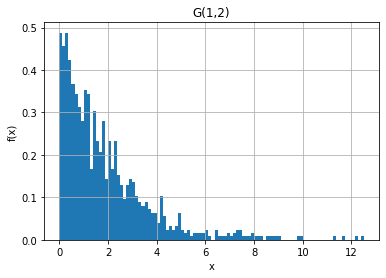

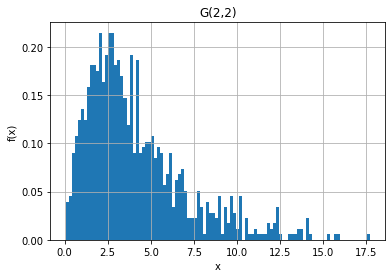

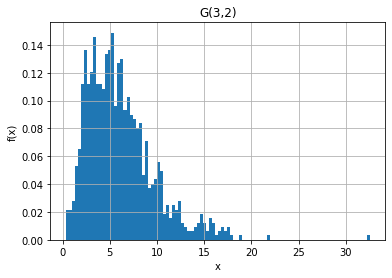

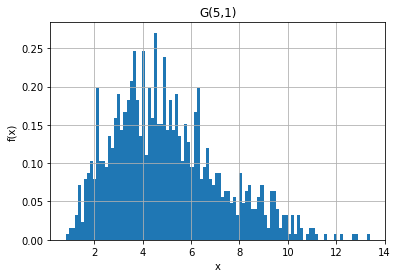

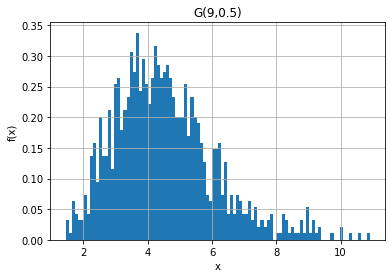

In [23]:
parameter = {}
parameter['G(1,2)'] = (1.0, 2.0)
parameter['G(2,2)'] = (2.0, 2.0) 
parameter['G(3,2)'] = (3.0, 2.0) 
parameter['G(5,1)'] = (5.0, 1.0)
samples = {}

for k, (shape, scale) in parameter.items(): 
    samples[k] = np.random.gamma(shape, scale, 1000)
    count, bins, ignored = plt.hist(samples[k], 100, density=True, cumulative=False)
    plt.title(k)
    plt.grid()
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.show()

Zadanie 2. Binomials and negative binomials

a) Binomials - models the number of success in a sequence of n independent trials.

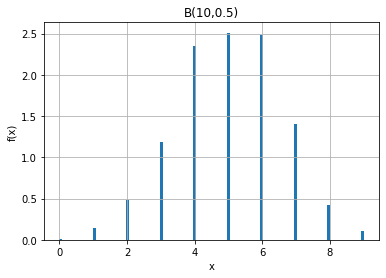

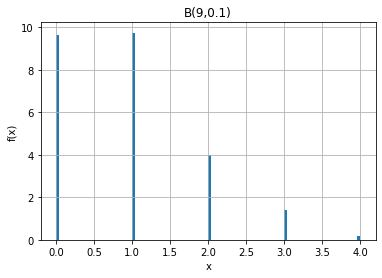

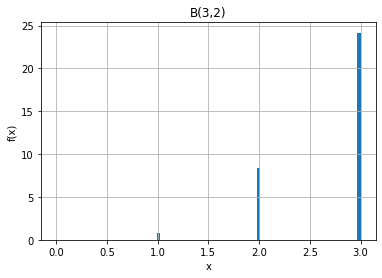

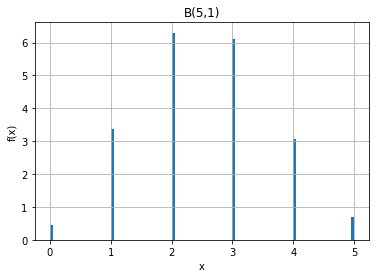

In [32]:
parameter = {}
parameter['B(10,0.5)'] = (10.0, 0.5)
parameter['B(9,0.1)'] = (9.0, 0.1) 
parameter['B(3,2)'] = (3.0, 0.9) 
parameter['B(5,1)'] = (5.0, 0.5)
samples = {}

for k, (n, p) in parameter.items(): 
    samples[k] = np.random.binomial(n, p, 1000)
    count, bins, ignored = plt.hist(samples[k], 100, density=True, cumulative=False)
    plt.title(k)
    plt.grid()
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.show()

b) Negative binomials - differencebeetwen a) and b) is that b) models the number of failures in a trial before specified numbers of success.

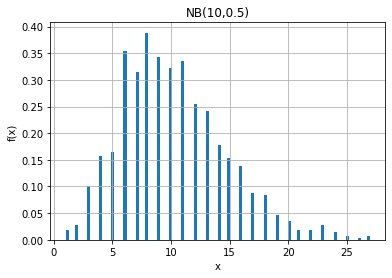

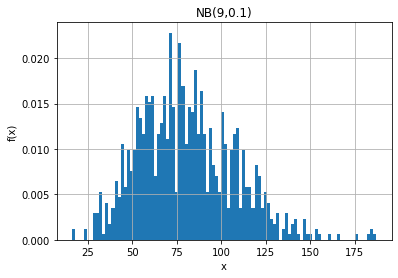

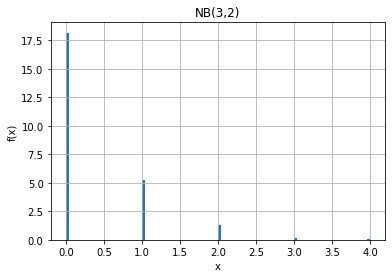

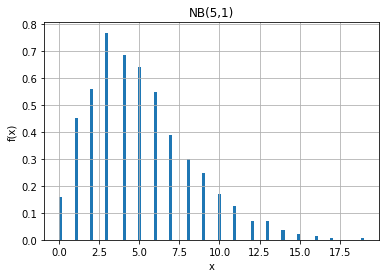

In [34]:
parameter = {}
parameter['NB(10,0.5)'] = (10.0, 0.5)
parameter['NB(9,0.1)'] = (9.0, 0.1) 
parameter['NB(3,2)'] = (3.0, 0.9) 
parameter['NB(5,1)'] = (5.0, 0.5)
samples = {}

for k, (n, p) in parameter.items(): 
    samples[k] = np.random.negative_binomial(n, p, 1000)
    count, bins, ignored = plt.hist(samples[k], 100, density=True, cumulative=False)
    plt.title(k)
    plt.grid()
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.show()

Zadanie 3. Multivariate normal

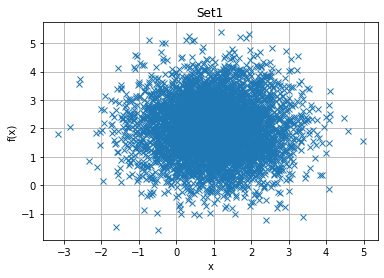

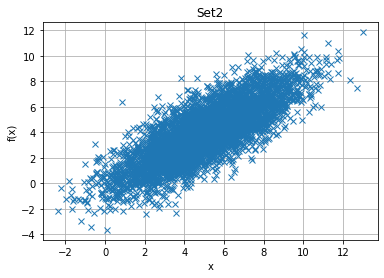

In [52]:
parameter = {}
parameter['Set1'] = ((1, 2), [[1, 0], [0, 1]])
parameter['Set2'] = ((5, 4), [[5, 4], [4, 5]])
samples = {}

for k, (mean, cov) in parameter.items(): 
    x, y = np.random.multivariate_normal(mean, cov, 5000).T
    plt.plot(x, y, 'x')
    plt.title(k)
    plt.grid()
    #plt.axis('equal')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.show()

Zadanie 4. Student-t distribution

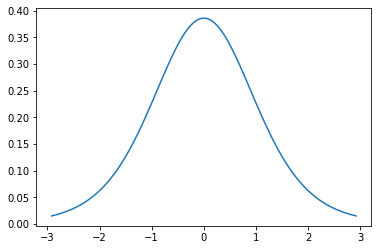

In [61]:
df = 7.74
mean, var, skew, kurt = t.stats(df, moments='mvsk')
x = np.linspace(t.ppf(0.01, df),t.ppf(0.99, df), 100)
plt.plot(x, t.pdf(x, df))